# <u>Project Design:</u>

## Proposal:

You have an entity that can move on a grid of size nxm, with the following moves allowed (one step at a time horizontally/vertically), and there are preset obstacles on the grid. The pre-set obstacles are chess pieces that will prevent the entity from moving to reach its goal. For example a bishop covering a diagonal and if the entity passes a square covered by the bishop's line it is eaten. The obstacle can be eaten by the entity if it is in its path. The task is to find the optimal and shortest path to a point B from a point A an algorithm called Breadth First Search BFS.


## Define the steps of the project

**1.** Define the work's plan (chessboard) and the class  
**2.** Define the visualization functions  
**3.** Add a security function  
**4.** Add two obstacles (like other chess's pieces) and their moves  
**5.** Define the function for the shortest path and add to avoid the areas covered by the two obstacles  
**6.** Add a visualization of the game and an interative input  

# <u>Code Part:</u>

In [1]:
# Import all the necessary packages:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#import pygame # Import Pygame to create an interactive graphical interface, if you choose to make the game visually dynamic
import scipy
from scipy.stats import norm
import random
import pandas as pd
from PIL import Image
from collections import deque

## 1. First step:

In [2]:
# Create the cells class:
class Cell:
    def __init__(self, x=0, y=0, dist=0, parent=None):
        self.x = x
        self.y = y
        self.dist = dist
        self.parent = parent

# Create the Chessboard:
def Chessboard(n):
    base_row = np.tile([1, 0], (n + 1) // 2)[:n]
    board = np.tile(base_row, (n, 1))
    for i in range(n):
        if i % 2 != 0:
            board[i] = np.roll(board[i], 1)
    return board

## 2. Second step:

In [3]:
# Define the visualization functions:
def plot_chessboard(ax, board):
    ax.imshow(board, cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

def plot_piece(ax, position, color, label):
    ax.add_patch(patches.Circle((position[1], position[0]), 0.4, color=color, fill=True))
    ax.text(position[1], position[0], label, color='white', fontsize=12, ha='center', va='center')

def plot_square(ax, position, color, linewidth):
    ax.add_patch(patches.Rectangle((position[1] - 0.5, position[0] - 0.5), 1, 1, edgecolor=color, facecolor='none', lw=linewidth))

# Funzione per visualizzare le caselle minacciate
def plot_threatened_squares(ax, n, bishopRow, bishopCol, rookRow, rookCol):
    if bishopRow < n and bishopCol < n:
        for i in range(n):
            for j in range(n):
                if abs(bishopRow - i) == abs(bishopCol - j) and (i != bishopRow or j != bishopCol):
                    ax.add_patch(patches.Circle((j, i), 0.2, color='purple', fill=True, alpha=0.5))

    if rookRow < n and rookCol < n:
        for i in range(n):
            if i != rookRow:
                ax.add_patch(patches.Circle((rookCol, i), 0.2, color='orange', fill=True, alpha=0.5))
            if i != rookCol:
                ax.add_patch(patches.Circle((i, rookRow), 0.2, color='orange', fill=True, alpha=0.5))

def draw_path(ax, path):
    for (i, j) in path:
        ax.add_patch(patches.Circle((j, i), 0.3, color='red', fill=True, alpha=0.7))
    for k in range(len(path) - 1):
        (i1, j1), (i2, j2) = path[k], path[k + 1]
        ax.plot([j1, j2], [i1, i2], color='red', linewidth=2)

## 3. Thirdth step:

In [4]:
def is_inside(x, y, n):
    return 0 <= x < n and 0 <= y < n

## 4. Fourth step:

In [5]:
def isBishopAlive(n, bishopRow, bishopCol):
    if bishopRow < n and bishopCol < n:
        return True
    else:
        return False
    
def isRookAlive(n, rookRow, rookCol):
    if rookRow < n and rookCol < n:
        return True
    else:
        return False

## 5. Fifth step:

In [6]:
def moves(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol):
    if startRow == endRow and startCol == endCol:  # Caso banale
        return 0, [(startRow, startCol)]
    
    moves = ((2,1), (1,2), (-1,2), (-2,1), (-2,-1), (-1,-2), (1,-2), (2,-1))
    queue = deque()
    queue.append([startRow, startCol, True, True, 0, [(startRow, startCol)]])  # Includere che il vescovo è vivo
    visited = set([(startRow, startCol, True, True)])  # Impostare come visitato
    
    while queue:
        i, j, alive_bishop, alive_rook, steps, path = queue.popleft()        
        for di, dj in moves:
            cr = i + di
            cc = j + dj
            
            # Aggiornare lo stato di vita solo per il percorso corrente
            stillalive_bishop = alive_bishop and (cr != bishopRow or cc != bishopCol)
            stillalive_rook = alive_rook and (cr != rookRow or cc != rookCol)
            
            if 0 <= cr < n and 0 <= cc < n and (cr, cc, stillalive_bishop, stillalive_rook) not in visited and (
                    not stillalive_bishop or abs(cr - bishopRow) != abs(cc - bishopCol)) and (
                    not stillalive_rook or (cr != rookRow and cc != rookCol)):
                
                if cr == endRow and cc == endCol:
                    return steps + 1, path + [(cr, cc)]
                
                pathnew = path + [(cr, cc)]
                queue.append((cr, cc, stillalive_bishop, stillalive_rook, steps + 1, pathnew))
                visited.add((cr, cc, stillalive_bishop, stillalive_rook))    
    return -1, None

## 6. Sixth step:

Minimum steps required: 7
Coordinate of the path: [(0, 0), (2, 1), (4, 0), (6, 1), (7, 3), (8, 5), (7, 7), (9, 6)]


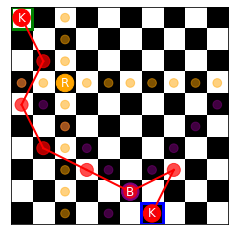

In [8]:
# Configurazione e visualizzazione della scacchiera e dei pezzi
n = 10
startRow, startCol = 0, 0
endRow, endCol = 9, 6
bishopRow, bishopCol = 8, 5
rookRow, rookCol = 3, 2

board = Chessboard(n)
fig, ax = plt.subplots()
plot_chessboard(ax, board)
plot_square(ax, (startRow, startCol), 'green', 3)
plot_square(ax, (endRow, endCol), 'blue', 3)
plot_piece(ax, (startRow, startCol), 'red', 'K')
plot_piece(ax, (bishopRow, bishopCol), 'purple', 'B')
plot_piece(ax, (rookRow, rookCol), 'orange', 'R')
plot_piece(ax, (endRow, endCol), 'red', 'K')
plot_threatened_squares(ax, n, bishopRow, bishopCol, rookRow, rookCol)


result = moves(n, startRow, startCol, endRow, endCol, bishopRow, bishopCol, rookRow, rookCol)
if result[0] != -1:
    steps, path = result
    draw_path(ax, path)
    print(f"Minimum steps required: {steps}")
    print("Coordinate of the path:", path)
else:
    print("No path found to reach the target.")

plt.show()